# 주제
(1) 상품군별 온라인 선호지수 및 수요 트렌드 예측에 대한 우수성

(2) 활용 변수의 다양성

(3) 제안 서비스의 창의성 및 시각화

# 1. 데이터 읽기

In [4]:
setwd("D:\\USER\\Desktop\\yangho\\제5회 Big Data Competition-Digital Trend Analyzer")

In [2]:
getwd()

[1] "D:/USER/Desktop/yangho/제5회 Big Data Competition-Digital Trend Analyzer"

In [3]:
library(data.table)

In [4]:
product<- fread("product.csv",encoding="UTF-8")
search1 <- fread("search1.csv",encoding="UTF-8")
search2 <- fread("search2.csv",encoding="UTF-8")
session <- fread("session.csv",encoding="UTF-8")
custom <- fread("custom.csv",encoding="UTF-8")
master <- fread("master.csv",encoding="UTF-8")

Warning message in fread("master.csv", encoding = "UTF-8"):
"Found and resolved improper quoting out-of-sample. First healed line 14803: <<"184538","PTPA<ec>닔<ec>긽" 踰좎씠鍮꾨━釉뚯쫰 <eb>궡異붾윺<ec>뿉<ec>뼱<ed>벂由ы뙆<ec>씠<ec>뼱(怨듦린泥<ad><ec>젙<ec>젣)_<ec>븷<ed>뵆,異쒖궛/<ec>쑁<ec>븘<ec>슜<ed>뭹,<ec>쑀<ec>븘<ec>뒪<ed>궓/諛붾뵒耳<ec>뼱,<ec>쑀<ec>븘<ec>슜<ed>솕<ec>옣<ed>뭹>>. If the fields are not quoted (e.g. field separator does not appear within any field), try quote="" to avoid this warning."

# 2. 데이터 확인 및 전처리

# Product
### 상품 구매(Product) : 분석기간 내 온라인에서 구매된 상품명, 상품금액/건수 등 방문자의 상품구매정보
### Product 테이블 내 히트일련번호(HITS_SEG)가 ‘1’인 데이터는 분석 시 이상치(Outlier)로 간주해주시기 바랍니다.

In [5]:
head(product)

CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1
4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
4142395,6158159,85,179538,(not set),[아베다],"39,000",1
4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,"39,000",1
4144917,6406509,78,190306,5개,데코르테,"39,000",5
4147643,4050743,66,149995,사이즈:옵션04.AN868_04 / 1개,앵글로매니아,"39,000",1


In [6]:
str(product)

Classes 'data.table' and 'data.frame':	5024906 obs. of  8 variables:
 $ CLNT_ID  : int  4139680 4140076 4142395 4144914 4144917 4147643 4147739 4148106 4148129 4148527 ...
 $ SESS_ID  : int  7605037 10189797 6158159 7935714 6406509 4050743 6881895 6537318 3942102 5718021 ...
 $ HITS_SEQ : int  12 13 85 12 78 66 10 21 2 19 ...
 $ PD_C     : int  642112 570603 179538 554336 190306 149995 568751 570603 755148 608620 ...
 $ PD_ADD_NM: chr  "색상:워터멜론" "색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개" "(not set)" "색상:블랙|사이즈:160cm(12~13세) / 1개" ...
 $ PD_BRA_NM: chr  "[바비브라운]" "데상트" "[아베다]" "아디다스 키즈" ...
 $ PD_BUY_AM: chr  "39,000" "39,000" "39,000" "39,000" ...
 $ PD_BUY_CT: chr  "1" "2" "1" "1" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [7]:
product$PD_BUY_AM=as.numeric(gsub(",","",product$PD_BUY_AM)) #금액 변환

In [8]:
product$PD_BUY_CT=as.numeric(gsub(",","",product$PD_BUY_CT)) # 수량 변환

In [9]:
library(stringr)
product$PD_BRA_NM=gsub("[[:space:]]","",product$PD_BRA_NM) #키워드 간 공백 제거
product$PD_BRA_NM=gsub("[[:punct:]]","",product$PD_BRA_NM) #브랜드명 특수문자 제거
product$PD_BRA_NM=str_trim(product$PD_BRA_NM,side="both") #키워드 내 공백 제거

In [10]:
str(product)

Classes 'data.table' and 'data.frame':	5024906 obs. of  8 variables:
 $ CLNT_ID  : int  4139680 4140076 4142395 4144914 4144917 4147643 4147739 4148106 4148129 4148527 ...
 $ SESS_ID  : int  7605037 10189797 6158159 7935714 6406509 4050743 6881895 6537318 3942102 5718021 ...
 $ HITS_SEQ : int  12 13 85 12 78 66 10 21 2 19 ...
 $ PD_C     : int  642112 570603 179538 554336 190306 149995 568751 570603 755148 608620 ...
 $ PD_ADD_NM: chr  "색상:워터멜론" "색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개" "(not set)" "색상:블랙|사이즈:160cm(12~13세) / 1개" ...
 $ PD_BRA_NM: chr  "바비브라운" "데상트" "아베다" "아디다스키즈" ...
 $ PD_BUY_AM: num  39000 39000 39000 39000 39000 39000 39000 39000 39000 39000 ...
 $ PD_BUY_CT: num  1 2 1 1 5 1 1 1 1 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [11]:
colSums(is.na(product))#결측값 확인

CLNT_ID   SESS_ID  HITS_SEQ      PD_C PD_ADD_NM PD_BRA_NM PD_BUY_AM PD_BUY_CT 
        0         0         0         0         0         0         0         0

In [12]:
#기본 key 고유 개수 확인
length(unique(product$CLNT_ID))
length(unique(product$SESS_ID))
length(unique(product$HITS_SEQ))
length(unique(product$PD_C))
length(unique(product$PD_ADD_NM))

[1] 922737

[1] 2425886

[1] 500

[1] 847652

[1] 759548

# Session
### 세션(Session) : 분석기간 내 온라인에서 상품을 구매한 방문자의 세션 정보 (단, 미상 정보 등은 제외됨)

In [13]:
head(session)

CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
5873599,8641867,9,20180509,82,"1,890",mobile,Daejeon,Daejeon
5873599,6616320,21,20180611,105,"1,604",mobile,Busan,Busan
5873599,5886172,40,20180624,41,632,mobile,Daejeon,Daejeon
5873884,1050889,15,20180913,160,"1,035",mobile,Gyeonggi-do,Anyang
5874461,10298270,5,20180412,13,298,mobile,Seoul,Seoul
5874701,608577,65,20180920,41,444,mobile,Seoul,Seoul


In [14]:
str(session)

Classes 'data.table' and 'data.frame':	2712907 obs. of  9 variables:
 $ CLNT_ID        : int  5873599 5873599 5873599 5873884 5874461 5874701 5874829 5874829 5874829 5874829 ...
 $ SESS_ID        : int  8641867 6616320 5886172 1050889 10298270 608577 1666766 1670494 1694242 1559438 ...
 $ SESS_SEQ       : int  9 21 40 15 5 65 87 86 85 92 ...
 $ SESS_DT        : int  20180509 20180611 20180624 20180913 20180412 20180920 20180903 20180903 20180902 20180904 ...
 $ TOT_PAG_VIEW_CT: int  82 105 41 160 13 41 36 103 154 24 ...
 $ TOT_SESS_HR_V  : chr  "1,890" "1,604" "632" "1,035" ...
 $ DVC_CTG_NM     : chr  "mobile" "mobile" "mobile" "mobile" ...
 $ ZON_NM         : chr  "Daejeon" "Busan" "Daejeon" "Gyeonggi-do" ...
 $ CITY_NM        : chr  "Daejeon" "Busan" "Daejeon" "Anyang" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [15]:
session$TOT_SESS_HR_V=as.numeric(gsub(",","",session$TOT_SESS_HR_V)) #HR_V 형식 변환

In [16]:
str(session)

Classes 'data.table' and 'data.frame':	2712907 obs. of  9 variables:
 $ CLNT_ID        : int  5873599 5873599 5873599 5873884 5874461 5874701 5874829 5874829 5874829 5874829 ...
 $ SESS_ID        : int  8641867 6616320 5886172 1050889 10298270 608577 1666766 1670494 1694242 1559438 ...
 $ SESS_SEQ       : int  9 21 40 15 5 65 87 86 85 92 ...
 $ SESS_DT        : int  20180509 20180611 20180624 20180913 20180412 20180920 20180903 20180903 20180902 20180904 ...
 $ TOT_PAG_VIEW_CT: int  82 105 41 160 13 41 36 103 154 24 ...
 $ TOT_SESS_HR_V  : num  1890 1604 632 1035 298 ...
 $ DVC_CTG_NM     : chr  "mobile" "mobile" "mobile" "mobile" ...
 $ ZON_NM         : chr  "Daejeon" "Busan" "Daejeon" "Gyeonggi-do" ...
 $ CITY_NM        : chr  "Daejeon" "Busan" "Daejeon" "Anyang" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [17]:
colSums(is.na(session)) #결측값 확인

CLNT_ID         SESS_ID        SESS_SEQ         SESS_DT TOT_PAG_VIEW_CT 
              0               0               0               0             274 
  TOT_SESS_HR_V      DVC_CTG_NM          ZON_NM         CITY_NM 
          14202               0               0               0

In [18]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [19]:
#VIEW_CT와 HR_V에 0인값이 있는지 확인해보자 
session  %>%  filter(TOT_PAG_VIEW_CT==0 | TOT_SESS_HR_V==0)

CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM


In [20]:
CT_OR_V_NA=session %>% filter( is.na(session$TOT_PAG_VIEW_CT)==TRUE | is.na(session$TOT_SESS_HR_V)==TRUE) # VIEW_CT or HR_V가 NA인 데이터

In [21]:
nrow(CT_OR_V_NA)

[1] 14211

In [22]:
nrow(CT_OR_V_NA)/nrow(session) #결측값 비율 0.5%

[1] 0.005238292

In [23]:
CT_AND_V_NA=session %>% filter( is.na(session$TOT_PAG_VIEW_CT)==TRUE & is.na(session$TOT_SESS_HR_V)==TRUE) # VIEW_CT and HR_V가 NA인 데이터

In [24]:
nrow(CT_AND_V_NA)

[1] 265

Session 데이터 내 결측값은 0.5%가 있으며,

VIEW_CT가 NA일떄 HR_V도 NA인경우가 265개로  VIEW_CT만 NA인 경우는 9개에 불과하고,

나머지는 조회수가 있음에도 조회시간이 측정이 안되는 경우가 대부분

따라서 조회수에 따라 조회시간을 살펴볼 필요가 있다고 판단

In [25]:
head(session[!complete.cases(session),])

CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
5878756,7465325,5,20180529,1,NA,mobile,Chungcheongnam-do,Cheonan-si
6065738,9564520,26,20180424,1,NA,mobile,Gyeonggi-do,Gwangmyeong-si
6065738,9564529,25,20180424,1,NA,mobile,Gyeonggi-do,Gwangmyeong-si
6003295,1035552,2,20180913,1,NA,desktop,Daejeon,Daejeon
5946142,9600252,4,20180423,1,NA,mobile,Seoul,Seoul
6163287,5612765,98,20180628,1,NA,mobile,Seoul,Seoul


위와 같이 조회건수 1이지만 조회시간이 결측값인 경우들이 있음

In [26]:
CT1_V_NA=session %>% filter( session$TOT_PAG_VIEW_CT==1 & is.na(session$TOT_SESS_HR_V)==TRUE) # VIEW_CT=1일떄 HR_V가 NA인 데이터

In [27]:
nrow(CT1_V_NA)

[1] 13870

In [28]:
nrow(CT1_V_NA)/sum(is.na(session$TOT_SESS_HR_V)) #VIEW_CT=1일때  HR_V의 97%이상이 입력되지 않음 

[1] 0.976623

In [29]:
CT2_V_NA=session %>% filter( session$TOT_PAG_VIEW_CT>1 & is.na(session$TOT_SESS_HR_V)==TRUE) # VIEW_CT가 1초과일 떄 HR_V가 NA인 데이터

In [30]:
nrow(CT2_V_NA)

[1] 67

In [31]:
CT2_V_NA %>% group_by(CT2_V_NA$TOT_PAG_VIEW_CT) %>% summarise(n=n())

CT2_V_NA$TOT_PAG_VIEW_CT,n
2,62
3,3
5,1
7,1


조회수가 낮을 떄 HR_V가 누락되는 경향이 있으며, 조회수가 1일때 97%이상이 누락

In [32]:
CT_NA=session %>% filter(is.na(session$TOT_PAG_VIEW_CT)==TRUE & is.na(session$TOT_SESS_HR_V)==FALSE)# VIEW_CT만 NA인 경우
CT_NA

CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
401333,3950587,5,20180725,NA,1583,mobile,Seoul,Seoul
3449659,4394290,1,20180718,NA,18,desktop,Busan,Busan
3309257,2890087,20,20180813,NA,9,mobile,Seoul,Seoul
19441,6220093,1,20180618,NA,5,desktop,Gyeonggi-do,Hwaseong-si
5483124,5361386,1,20180702,NA,44,desktop,Chungcheongbuk-do,Okcheon-gun
3436252,3960033,5,20180725,NA,2,mobile,Gyeonggi-do,Gimpo-si
99352,6907444,1,20180607,NA,53,desktop,Gyeonggi-do,Siheung-si
2549138,5905220,1,20180623,NA,1,desktop,Gwangju,Gwangju
2458359,3251800,1,20180806,NA,2,desktop,Daejeon,Daejeon


## 결측값 처리

1. HR_V만 Na인경우

   이떄의 VIEW_C T역시 0값이 존재하지 않으며, VIEW_C가 1일 떄 97%이상이 HR_V가 Na임. 
   
   조회시간이 너무 짧아 측정되지 않은 것으로 판단. 이떄의 HR_V는 0으로 처리.


2. VIEW_CT만 Na인 경우 

   세션의 오류로 인해 페이지 뷰 수가 늘어나지 않은 것으로 생각된다.

   따라서 VIEW_CT만 Na인 경우, 9개의 데이터에서 VIEW_CT는 1로 처리



3. VIEW_CT,HR_V 모두 Na인 경우 
    
   265개의 데이터로 두 변수 모두 0으로 처리

In [33]:
clean=session %>% filter(is.na(session$TOT_PAG_VIEW_CT)==FALSE & is.na(session$TOT_SESS_HR_V)==FALSE) #결측값이 없는 데이터
CT_NA[is.na(CT_NA)]=1 #CT만 NA인경우 1로 처리
CT1_V_NA[is.na(CT1_V_NA)]=0 #CT가 1일떄 HR_V NA인 경우 0으로 처리
CT2_V_NA[is.na(CT2_V_NA)]=0 #CT가 1이상 일떄 HR_V NA인 경우 0으로 처리
CT_AND_V_NA[is.na(CT_AND_V_NA)]=0 #CT 와 HR_V가 둘다 NA인 경우 0으로 처리
new_session=rbind(clean,CT_NA,CT1_V_NA,CT2_V_NA,CT_AND_V_NA)

In [34]:
str(new_session)

'data.frame':	2712907 obs. of  9 variables:
 $ CLNT_ID        : int  5873599 5873599 5873599 5873884 5874461 5874701 5874829 5874829 5874829 5874829 ...
 $ SESS_ID        : int  8641867 6616320 5886172 1050889 10298270 608577 1666766 1670494 1694242 1559438 ...
 $ SESS_SEQ       : int  9 21 40 15 5 65 87 86 85 92 ...
 $ SESS_DT        : int  20180509 20180611 20180624 20180913 20180412 20180920 20180903 20180903 20180902 20180904 ...
 $ TOT_PAG_VIEW_CT: num  82 105 41 160 13 41 36 103 154 24 ...
 $ TOT_SESS_HR_V  : num  1890 1604 632 1035 298 ...
 $ DVC_CTG_NM     : chr  "mobile" "mobile" "mobile" "mobile" ...
 $ ZON_NM         : chr  "Daejeon" "Busan" "Daejeon" "Gyeonggi-do" ...
 $ CITY_NM        : chr  "Daejeon" "Busan" "Daejeon" "Anyang" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [35]:
new_session=as.data.table(new_session)  #속도 향상을 위해 형식변환

In [36]:
#기본키 고유 개수 확인
length(unique(new_session$CLNT_ID))

length(unique(new_session$SESS_ID))

[1] 922737

[1] 2425886

In [37]:
library(ggplot2)

DVC_CTG_NM,N
mobile,2289681
desktop,411169
tablet,12057


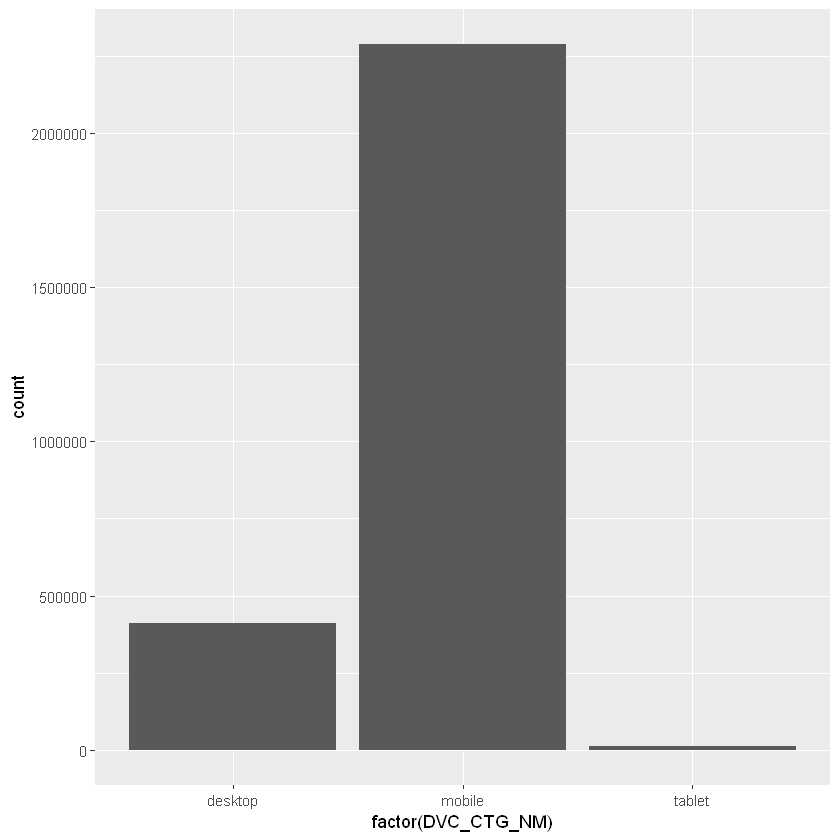

In [38]:
new_session[, .N, by = DVC_CTG_NM]
ggplot(new_session, aes(x=factor(DVC_CTG_NM))) + geom_bar()

In [39]:
new_session[, .N, by = ZON_NM]  %>% arrange(desc(N))

ZON_NM,N
Seoul,1019843
Gyeonggi-do,469954
Busan,295940
Gyeongsangnam-do,128716
Daegu,116707
Incheon,100728
Gyeongsangbuk-do,91183
Jeollabuk-do,78437
Chungcheongnam-do,78072
Gwangju,70773


Session테이블이 분석기간 내 온라인에서 상품을 구매한 방문자의 세션정보로

Session테이블 역시 상품을 구매한 방문자들의 정보가 기록되있다는 것을 알 수 있다.

SESS_DT는 구매날짜로 유추

그리고 product와 session테이블의 기본키들의 개수가 같기 때문에

두 테이블을 merge할 필요가 있다고 판단하였다.

In [41]:
product_session=merge(product,new_session,by=c("CLNT_ID","SESS_ID"),all=T)

In [42]:
str(product_session) #product테이블의 행 개수와 일치하므로 이 두테이블은 Merge할 필요가 있다는 방증이다.
colSums(is.na(product_session))

Classes 'data.table' and 'data.frame':	5024906 obs. of  15 variables:
 $ CLNT_ID        : int  8 8 14 14 25 25 25 25 32 32 ...
 $ SESS_ID        : int  6964877 7017688 1156991 1156991 5317297 6059256 8113243 9506206 759569 759569 ...
 $ HITS_SEQ       : int  40 74 284 284 8 8 9 11 37 37 ...
 $ PD_C           : int  206218 206218 645262 369141 598634 715072 715121 715121 31982 31974 ...
 $ PD_ADD_NM      : chr  "색상:BLACK|사이즈:ONE SIZE / 1개" "색상:BLACK|사이즈:ONE SIZE / 1개" "색상:LL1G14817AIN|사이즈:FREE / 1개" "색상:LL2G16216RGB|사이즈:FREE / 1개" ...
 $ PD_BRA_NM      : chr  "플라넷비" "플라넷비" "로이드주얼리" "로이드" ...
 $ PD_BUY_AM      : num  38000 38000 29900 39900 39800 47000 92000 92000 9900 9900 ...
 $ PD_BUY_CT      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ SESS_SEQ       : int  7 2 5 5 213 204 160 111 105 105 ...
 $ SESS_DT        : int  20180606 20180605 20180911 20180911 20180703 20180621 20180518 20180425 20180917 20180917 ...
 $ TOT_PAG_VIEW_CT: num  38 55 256 256 33 7 28 12 124 124 ...
 $ TOT_SESS_HR_V  : num 

CLNT_ID         SESS_ID        HITS_SEQ            PD_C       PD_ADD_NM 
              0               0               0               0               0 
      PD_BRA_NM       PD_BUY_AM       PD_BUY_CT        SESS_SEQ         SESS_DT 
              0               0               0               0               0 
TOT_PAG_VIEW_CT   TOT_SESS_HR_V      DVC_CTG_NM          ZON_NM         CITY_NM 
              0               0               0               0               0

# Master
### 상품분류(master): 상품별 상품명, 대/중/소 분류명 정보

In [43]:
head(master)

PD_C,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
62282,여자 플라워덧신 2족선물세트 17403-2set,속옷/양말/홈웨어,여성양말류,여성일반양말
61729,88A2933253배트맨스웨트티 - 블랙 / 130,유아동의류,유아의류상의,영유아티셔츠/탑
61537,"닥터마틴 아드리안 블랙, 체리레드 - 02_체리레드 / 250mm(6)",패션잡화,남성화,남성부츠
58820,여성 그레이 스트라이프 퍼프 소매 블라우스 (128865YQ33) - 회색(앤틱실버) / S,남성의류,남성의류상의,남성남방셔츠
58280,선염스트라이프레이스패치원피스 JROP521D - 블루 / 85,여성의류,여성의류전신,여성원피스


In [44]:
str(master)

Classes 'data.table' and 'data.frame':	847652 obs. of  5 variables:
 $ PD_C    : int  64382 62282 61729 61537 58820 58280 58183 58098 58057 56306 ...
 $ PD_NM   : chr  "언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95]" "여자 플라워덧신 2족선물세트 17403-2set" "88A2933253배트맨스웨트티 - 블랙 / 130" "닥터마틴 아드리안 블랙, 체리레드 - 02_체리레드 / 250mm(6)" ...
 $ CLAC1_NM: chr  "스포츠패션" "속옷/양말/홈웨어" "유아동의류" "패션잡화" ...
 $ CLAC2_NM: chr  "남성일반스포츠의류" "여성양말류" "유아의류상의" "남성화" ...
 $ CLAC3_NM: chr  "남성스포츠티셔츠" "여성일반양말" "영유아티셔츠/탑" "남성부츠" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [45]:
CLAC1=master %>% select(CLAC1_NM) %>% unique()

In [46]:
dim(CLAC1)# 상품군 대분류 37개

[1] 37  1

In [47]:
head(CLAC1)

CLAC1_NM
스포츠패션
속옷/양말/홈웨어
유아동의류
패션잡화
남성의류
여성의류


product_session 테이블 내 PD_C와 Master 테이블 내 PD_C를 병합할 시,

구매자의 상품분류까지 알 수 있어 병합을 진행하였다.

product_session의 고유한 PD_C와 master의 고유한 PD_C 개수 또한 같았다.

In [48]:
length(unique(product_session$PD_C))
length(unique(master$PD_C))

[1] 847652

[1] 847652

In [49]:
product_session_master=merge(product_session,master,by='PD_C',all=TRUE)

In [50]:
str(product_session_master)
colSums(is.na(product_session_master))

Classes 'data.table' and 'data.frame':	5024906 obs. of  19 variables:
 $ PD_C           : int  1 2 3 3 3 3 4 5 6 7 ...
 $ CLNT_ID        : int  269002 1373088 206440 2837561 4498341 4498341 2203912 782544 3174521 179954 ...
 $ SESS_ID        : int  8402189 9368697 10764490 2929769 5790483 5790483 7724400 5606365 9197306 4741330 ...
 $ HITS_SEQ       : int  44 26 102 50 30 30 54 26 59 79 ...
 $ PD_ADD_NM      : chr  "1개" "1개" "선택:블랙 / 1개" "선택:블랙 / 1개" ...
 $ PD_BRA_NM      : chr  "풍년" "스톤헨지주얼리" "XEEON" "XEEON" ...
 $ PD_BUY_AM      : num  89000 39000 7900 7900 7900 ...
 $ PD_BUY_CT      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ SESS_SEQ       : int  358 43 653 212 18 18 280 283 27 4 ...
 $ SESS_DT        : int  20180513 20180427 20180404 20180812 20180625 20180625 20180524 20180628 20180430 20180712 ...
 $ TOT_PAG_VIEW_CT: num  72 25 102 50 29 29 54 30 60 80 ...
 $ TOT_SESS_HR_V  : num  890 106 970 331 150 ...
 $ DVC_CTG_NM     : chr  "mobile" "mobile" "mobile" "mobile" ...
 $ ZON_NM         : 

PD_C         CLNT_ID         SESS_ID        HITS_SEQ       PD_ADD_NM 
              0               0               0               0               0 
      PD_BRA_NM       PD_BUY_AM       PD_BUY_CT        SESS_SEQ         SESS_DT 
              0               0               0               0               0 
TOT_PAG_VIEW_CT   TOT_SESS_HR_V      DVC_CTG_NM          ZON_NM         CITY_NM 
              0               0               0               0               0 
          PD_NM        CLAC1_NM        CLAC2_NM        CLAC3_NM 
              0               0               0               0

product_session_master테이블 내 HITS_SEQ=1은 이상치로 간주하라.

In [51]:
sum(product_session_master$HITS_SEQ==1)/nrow(product_session_master)

[1] 0.001030069

In [52]:
product_session_master  %>% filter(HITS_SEQ==1)

PD_C,CLNT_ID,SESS_ID,HITS_SEQ,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
269,763561,7953650,1,1개,골든벨,16900,1,27,20180520,1,0,mobile,Gyeongsangbuk-do,Gyeongju-si,리멤버 주름수반(대)+도자기 티스푼포크 11P 세트,식기/조리기구,그릇/식기,디저트포크/스푼
318,5222222,10198148,1,1개,더바디샵,28000,1,2,20180413,1,0,mobile,Seoul,Seoul,화이트 머스크 바디 크림 200ML(59016),퍼스널케어,바디케어,바디보습
461,2812387,3243706,1,1개,버키비버,4930,1,43,20180806,4,4,mobile,Gyeonggi-do,Yongin-si,버키비버 유아치실/어린이치실/치간칫솔/아기치실/유아용치실/혀크리너/유아치약/키즈치실,출산/육아용품,유아위생용품,유아/아동용칫솔
487,1795923,9472467,1,2개,이아소,24300,2,2,20180425,1,0,mobile,Incheon,Incheon,닥터이아소 엑스폴리에이팅 프렙,화장품/뷰티케어,스킨케어,에센스/세럼
508,2842179,10007524,1,타입:Q|사이즈:85AA / 2개,판도라바이비비안,6900,2,177,20180416,21,1469,mobile,Seoul,Seoul,외 1.2.3단계 주니어 브라 택1 tb-251 - S / 70AA,속옷/양말/홈웨어,여성속옷,브래지어
508,2842179,10007524,1,타입:T|사이즈:85A / 2개,판도라바이비비안,6900,2,177,20180416,21,1469,mobile,Seoul,Seoul,외 1.2.3단계 주니어 브라 택1 tb-251 - S / 70AA,속옷/양말/홈웨어,여성속옷,브래지어
700,4491057,10559965,1,1개,에이엔에프,60000,1,12,20180407,1,0,mobile,Busan,Busan,ANF 유기농 양고기 (전연령) 6kg,원예/애완,애견용품,애견사료
804,6051543,9581607,1,1개,아토팜,29900,1,2,20180423,5,236,mobile,Gyeongsangbuk-do,Yeongju-si,MLE 로션 대용량 300ml [gift] 베스트 키트 6종,출산/육아용품,유아스킨/바디케어,유아용화장품
878,5102345,2505685,1,색상:투명 / 1개,아레나수영복,22000,1,206,20180819,1,0,mobile,Gyeonggi-do,Seongnam-si,아레나 쥬니어 AGL-5100J 수경(AOAAG51) 물안경 수영안경 케이스 포함 - 블랙,시즌스포츠,수영/물놀이,기타물놀이용품
1021,4246272,10785113,1,1개,썬터치,29500,1,307,20180404,1,0,mobile,Seoul,Seoul,[썬터치]휴대용가스렌지ST-001A/국산/휴대용버너/부르스타/가스버너/캠핑/부탄가스/업소용/그릴/불판/야외,생활/주방가전,주방가전,인덕션/가스레인지


In [53]:
sum(product_session_master$HITS_SEQ==1)#이상치 개수 확인

[1] 5176

In [54]:
product_session_master  %>% filter(HITS_SEQ==1)  %>% filter(TOT_SESS_HR_V==0)  %>% summarise(n=n())

n
3224


In [55]:
3224/5176

[1] 0.6228748

상품을 구매한 정보가 담긴 product_session_master내 HITS_SEQ=1은 논리적으로 존재할 수 없다고 판단되며, 

HITS_SEQ가 1일떄의 SESS_HR_V의 값이 0인 행들이 62%이상이다. 여기서의 0은 원자료 session테이블 내 결측값이었던 자료이다.

또한 이상치 비율이 0.01%의 정도로 테이블 내 이상치를 삭제하는 것이 옳다고 판단

In [56]:
product_session_master=product_session_master %>% filter(HITS_SEQ!=1) #이상치 삭제

# Custom
### 회원(Custom) : 분석기간 내 온라인에서 상품을 구매한 방문자의 성별/연령 정보 (단, 미상 정보 등은 제외됨)

In [57]:
head(custom)

CLNT_ID,CLNT_GENDER,CLNT_AGE
4830726,F,30
4830874,F,40
4830975,F,30
4831275,F,30
4825325,F,30
4825382,F,40


In [58]:
custom  %>% filter(CLNT_ID==58627)

CLNT_ID,CLNT_GENDER,CLNT_AGE


In [59]:
str(custom)

Classes 'data.table' and 'data.frame':	671679 obs. of  3 variables:
 $ CLNT_ID    : int  4830726 4830874 4830975 4831275 4825325 4825382 4825797 4825908 4825961 4840532 ...
 $ CLNT_GENDER: chr  "F" "F" "F" "F" ...
 $ CLNT_AGE   : int  30 40 30 30 30 40 40 30 30 40 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [60]:
colSums(is.na(custom))

CLNT_ID CLNT_GENDER    CLNT_AGE 
          0           0           0

In [61]:
length(unique(custom$CLNT_ID)) / nrow(custom) #CLNT_ID 중복이 있는지 확인

[1] 1

In [62]:
length(unique(custom$CLNT_ID))

[1] 671679

CLNT_GENDER,N
F,570616
M,101063


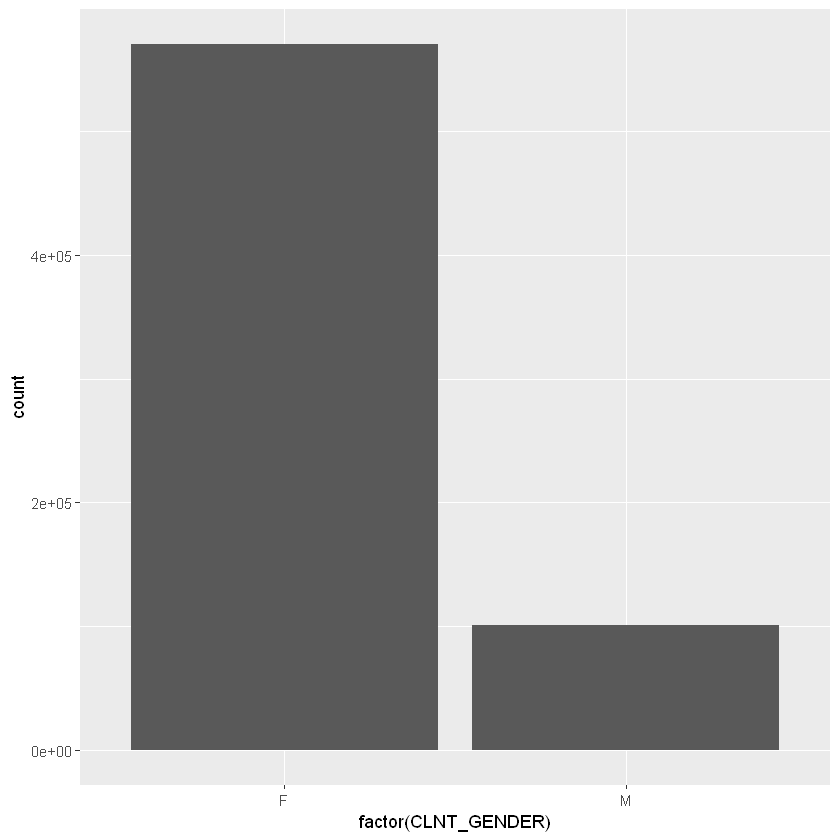

In [63]:
custom[, .N, by = CLNT_GENDER]
ggplot(custom, aes(x=factor(CLNT_GENDER))) + geom_bar()

CLNT_AGE,N
30,313600
40,216217
20,95297
50,36624
60,5256
10,3807
70,846
80,32


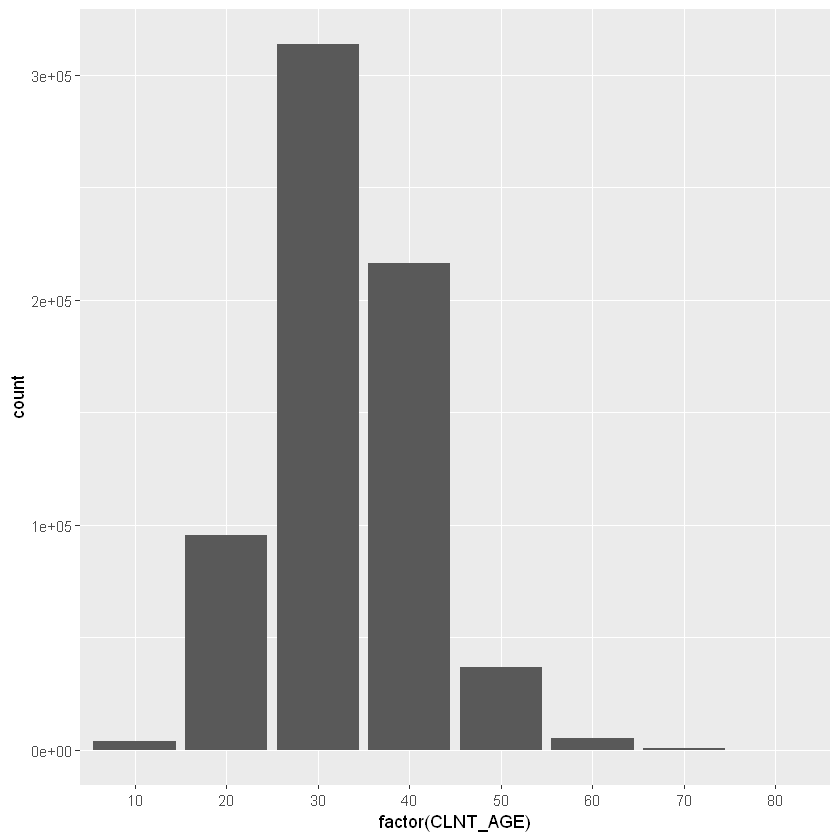

In [64]:
custom[, .N, by = CLNT_AGE]  %>%  arrange(desc(N))
ggplot(custom, aes(x=factor(CLNT_AGE))) + geom_bar()

구매자의 성별,연령을 알기 위해 Custom을 merge

product_session_master테이블 내 CLNT_ID가 Custom의 CLNT_ID에 안속하는지 확인을 해보았을 떄 속하지 않은것은 없었음

따라서 merge했을 때 큰 무리가 없다고 판단

In [65]:
all_product=merge(product_session_master,custom,by='CLNT_ID',all.x=TRUE)

In [66]:
str(all_product)
colSums(is.na(all_product))

'data.frame':	5019730 obs. of  21 variables:
 $ CLNT_ID        : int  8 8 14 14 25 25 25 25 32 32 ...
 $ PD_C           : int  206218 206218 369141 645262 715072 715121 598634 715121 38697 31982 ...
 $ SESS_ID        : int  7017688 6964877 1156991 1156991 6059256 9506206 5317297 8113243 1136737 759569 ...
 $ HITS_SEQ       : int  74 40 284 284 8 11 8 9 72 37 ...
 $ PD_ADD_NM      : chr  "색상:BLACK|사이즈:ONE SIZE / 1개" "색상:BLACK|사이즈:ONE SIZE / 1개" "색상:LL2G16216RGB|사이즈:FREE / 1개" "색상:LL1G14817AIN|사이즈:FREE / 1개" ...
 $ PD_BRA_NM      : chr  "플라넷비" "플라넷비" "로이드" "로이드주얼리" ...
 $ PD_BUY_AM      : num  38000 38000 39900 29900 47000 92000 39800 92000 30000 9900 ...
 $ PD_BUY_CT      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ SESS_SEQ       : int  2 7 5 5 204 111 213 160 99 105 ...
 $ SESS_DT        : int  20180605 20180606 20180911 20180911 20180621 20180425 20180703 20180518 20180911 20180917 ...
 $ TOT_PAG_VIEW_CT: num  55 38 256 256 7 12 33 28 81 124 ...
 $ TOT_SESS_HR_V  : num  468 366 7098 7098 99 ...

CLNT_ID            PD_C         SESS_ID        HITS_SEQ       PD_ADD_NM 
              0               0               0               0               0 
      PD_BRA_NM       PD_BUY_AM       PD_BUY_CT        SESS_SEQ         SESS_DT 
              0               0               0               0               0 
TOT_PAG_VIEW_CT   TOT_SESS_HR_V      DVC_CTG_NM          ZON_NM         CITY_NM 
              0               0               0               0               0 
          PD_NM        CLAC1_NM        CLAC2_NM        CLAC3_NM     CLNT_GENDER 
              0               0               0               0         1035893 
       CLNT_AGE 
        1035893

In [67]:
length(unique(all_product$CLNT_ID))

[1] 922618

custom CLNT ID개수 671679개

all_product 고유한 CLNT_ID의 개수 922618개

250939개는 한명의 사람이 다른 CLNT_ID로

이미 회원가입을 했다는 것을 알 수 있음

결측값 1035893개는 다른 CLNT_ID로 회원가입을 한 사람이 구매했다는 것을 방증

In [68]:
length(unique(all_product$PD_C))

[1] 847609

In [69]:
fwrite(all_product,file="all_product.csv")

# Search1
### 검색어1(Search1) : 분석기간 내 온라인에서 상품을 구매한 방문자가 검색한 검색어의 검색량

In [70]:
head(search1)

CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
5607714,7112876,빌리프 아이크림,6
5607714,4090791,프리메라 마스크팩,3
5607714,4090791,여성청결제,1
5612428,1876482,명품가방,1
5612428,658123,콩순이 아이스크림,1
5612428,1876482,블루독 티셔츠 남아,1


In [71]:
str(search1)

Classes 'data.table' and 'data.frame':	2884943 obs. of  4 variables:
 $ CLNT_ID   : int  5607714 5607714 5607714 5612428 5612428 5612428 5612471 5612471 5613055 5613055 ...
 $ SESS_ID   : int  7112876 4090791 4090791 1876482 658123 1876482 8539312 8539312 8510027 8510027 ...
 $ KWD_NM    : chr  "빌리프 아이크림" "프리메라 마스크팩" "여성청결제" "명품가방" ...
 $ SEARCH_CNT: int  6 3 1 1 1 1 1 1 2 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [72]:
a=grep("[ㄱ-ㅣ+]",search1$KWD_NM,value=T) 
b=grep("^[a-z]$",search1$KWD_NM,value=T) 
c=grep("^\\d+$",search1$KWD_NM,value=T)
head(a)
head(b)
head(c)

[1] "ㅋ" "ㅅ" "ㄷ" "ㄱ" "ㄷ" "ㅂ"

[1] "h" "h" "g" "h" "h" "h"

[1] "240"    "240"    "418506" "418507" "418505" "718834"

In [73]:
#이상치 처리
library(stringr)
search1$KWD_NM<-str_to_lower(search1$KWD_NM) #영문자들을 소문자로 변환
search1$KWD_NM<-gsub("[[:space:]]","",search1$KWD_NM) #키워드 간 공백 제거
search1$KWD_NM<-gsub("[[:punct:]]","",search1$KWD_NM) #특수문자 제거
search1$KWD_NM<-gsub("[ㄱ-ㅣ+]","",search1$KWD_NM) #한글 자음 처리
search1$KWD_NM<-gsub("^[a-z]$","",search1$KWD_NM) #소문자 처리
search1$KWD_NM<-gsub("^\\d+$","",search1$KWD_NM) #단순 숫자 처리
search1$KWD_NM<-str_trim(search1$KWD_NM,side="both") #키워드 내 공백 제거

In [74]:
new_search1= search1 %>% mutate( KWD_CHR=apply(search1,2,nchar)[,3] ) #키워드에 따른 문자 개수를 살펴보자

In [75]:
head(new_search1)

CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT,KWD_CHR
5607714,7112876,빌리프아이크림,6,7
5607714,4090791,프리메라마스크팩,3,8
5607714,4090791,여성청결제,1,5
5612428,1876482,명품가방,1,4
5612428,658123,콩순이아이스크림,1,8
5612428,1876482,블루독티셔츠남아,1,8


In [76]:
new_search1 %>% group_by(KWD_CHR) %>% summarise(n=n()) #키워드문자열 개수는 0부터 19개 

KWD_CHR,n
0,4474
1,17911
2,231045
3,395289
4,552111
5,538609
6,447602
7,317026
8,199514
9,99726


이상치로 처리 후 키워드 검색명이 공백, 즉 키워드문자열 개수가 0인 개수는 4474개

키워드 검색명이 공백인 것은 검색데이터에 의미가 없다고 판단

이상치 삭제

In [77]:
new_search1=new_search1 %>% filter(KWD_CHR!=0) # 키워드가 없는 행들 삭제처리

In [78]:
new_search1=new_search1 %>% select(c("CLNT_ID","SESS_ID","KWD_NM","SEARCH_CNT")) #변수 KWD_CHR 삭제

In [79]:
new_search1 %>% filter(CLNT_ID==5555838)

CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
5555838,4482725,첨이첨이런닝,2
5555838,4465994,마이수야,5
5555838,4822207,여성여름청바지,2
5555838,4482725,풍기인견,2
5555838,4465994,여성프릴티셔츠,3
5555838,4465994,랩,2
5555838,4465994,컨텍유,1
5555838,4822207,여성티,1
5555838,4481164,풍기인견파자마,3
5555838,4822207,여름여성청바지,2


키워드들이 전처리 되면서 같은 키워드를 가짐에도 불구하고  SEARCH_CNT들이 다르게 되는 경우가 발생 ex)풍기인견파자마

SEARCH_CNT들을 합칠 필요가 있다고 생각

In [80]:
library(reshape2)


Attaching package: 'reshape2'

The following objects are masked from 'package:data.table':

    dcast, melt



In [81]:
new_search1 <- melt(new_search1, id.vars=c("CLNT_ID","SESS_ID","KWD_NM"))

In [82]:
new_search1=dcast(new_search1,CLNT_ID+SESS_ID+KWD_NM~variable,sum)

In [83]:
new_search1 %>% filter(CLNT_ID==5555838)

CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
5555838,4482725,첨이첨이런닝,2
5555838,4465994,마이수야,5
5555838,4822207,여성여름청바지,2
5555838,4482725,풍기인견,2
5555838,4465994,여성프릴티셔츠,3
5555838,4465994,랩,2
5555838,4465994,컨텍유,1
5555838,4822207,여성티,1
5555838,4481164,풍기인견파자마,4
5555838,4822207,여름여성청바지,2


In [84]:
colSums(is.na(new_search1))

CLNT_ID    SESS_ID     KWD_NM SEARCH_CNT 
         0          0          0          0

In [85]:
str(new_search1)

'data.frame':	2868640 obs. of  4 variables:
 $ CLNT_ID   : int  5607714 5607714 5607714 5612428 5612428 5612428 5612471 5612471 5613055 5613055 ...
 $ SESS_ID   : int  7112876 4090791 4090791 1876482 658123 1876482 8539312 8539312 8510027 8510027 ...
 $ KWD_NM    : chr  "빌리프아이크림" "프리메라마스크팩" "여성청결제" "명품가방" ...
 $ SEARCH_CNT: int  6 3 1 1 1 1 1 1 2 1 ...


In [86]:
new_search1=as.data.table(new_search1) #빠른계산을 위해 형식변환

In [87]:
#기본키 고유개수 확인
length(unique(new_search1$CLNT_ID))

length(unique(new_search1$SESS_ID))

[1] 510713

[1] 1158974

In [88]:
fwrite(new_search1,file="new_search1.csv")

# Search2
### 검색어2(Search2) : 분석기간 내 검색된 일별/검색어별 검색량

In [89]:
head(search2)

SESS_DT,KWD_NM,SEARCH_CNT
20180407,닥스원피스,8
20180407,닥터지 브라이트닝,1
20180407,달팡 인트랄,2
20180407,대상트,1
20180407,더블유닷,6
20180407,더블하트 모유실감,1


In [90]:
str(search2)

Classes 'data.table' and 'data.frame':	8051172 obs. of  3 variables:
 $ SESS_DT   : int  20180407 20180407 20180407 20180407 20180407 20180407 20180407 20180407 20180407 20180407 ...
 $ KWD_NM    : chr  "닥스원피스" "닥터지 브라이트닝" "달팡 인트랄" "대상트" ...
 $ SEARCH_CNT: chr  "8" "1" "2" "1" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [91]:
search2$SEARCH_CNT=as.numeric(gsub(",","",search2$SEARCH_CNT)) #SEARCH_CNT 형식 변환

In [92]:
#KWD_NM 처리
search2$KWD_NM<-str_to_lower(search2$KWD_NM) #영문자들을 소문자로 변환
search2$KWD_NM<-gsub("[[:space:]]","",search2$KWD_NM) #키워드 간 공백 제거
search2$KWD_NM<-gsub("[[:punct:]]","",search2$KWD_NM) #특수문자 제거
search2$KWD_NM<-gsub("[ㄱ-ㅣ+]","",search2$KWD_NM) #한글 자음 처리
search2$KWD_NM<-gsub("^[a-z]$","",search2$KWD_NM) #소문자 처리
search2$KWD_NM<-gsub("^\\d+$","",search2$KWD_NM) #단순 숫자 처리
search2$KWD_NM<-str_trim(search2$KWD_NM,side="both") #키워드 내 공백 제거

In [93]:
new_search2= search2 %>% mutate( KWD_CHR=apply(search2,2,nchar)[,2] ) #키워드에 따른 문자 개수를 살펴보자

In [94]:
head(new_search2)

SESS_DT,KWD_NM,SEARCH_CNT,KWD_CHR
20180407,닥스원피스,8,5
20180407,닥터지브라이트닝,1,8
20180407,달팡인트랄,2,5
20180407,대상트,1,3
20180407,더블유닷,6,4
20180407,더블하트모유실감,1,8


In [95]:
new_search2 %>% group_by(KWD_CHR) %>% summarise(n=n()) #키워드문자열 개수는 0부터 53개 

KWD_CHR,n
0,34273
1,25396
2,359380
3,769465
4,1371832
5,1588898
6,1487995
7,1048653
8,688197
9,366322


In [96]:
new_search2=new_search2 %>% filter(KWD_CHR!=0) # 키워드가 없는 행들 삭제처리

In [97]:
new_search2=new_search2 %>% select(c("SESS_DT","KWD_NM","SEARCH_CNT")) #변수 KWD_CHR 삭제

In [98]:
new_search2=as.data.table(new_search2) #빠른계산을 위해 형식변환

In [99]:
new_search2%>% filter(SESS_DT==20180401) %>% filter(KWD_NM=="14k귀걸이")

SESS_DT,KWD_NM,SEARCH_CNT
20180401,14k귀걸이,3
20180401,14k귀걸이,71
20180401,14k귀걸이,7


키워드들이 전처리 되면서 같은 키워드를 가짐에도 불구하고  SEARCH_CNT들이 다르게 되는 경우가 발생

SEARCH_CNT들을 합칠 필요가 있다고 생각

In [100]:
new_search2 <- melt(new_search2, id.vars=c("SESS_DT","KWD_NM"))

In [101]:
new_search2=dcast(new_search2,SESS_DT+KWD_NM~variable,sum)

In [102]:
new_search2%>% filter(SESS_DT==20180401) %>% filter(KWD_NM=="14k귀걸이") #같은 키워드에서 SEARCH_CNT가 잘합쳐진 것을 확인

SESS_DT,KWD_NM,SEARCH_CNT
20180401,14k귀걸이,81


In [103]:
str(new_search2)

'data.frame':	6750385 obs. of  3 variables:
 $ SESS_DT   : int  20180401 20180401 20180401 20180401 20180401 20180401 20180401 20180401 20180401 20180401 ...
 $ KWD_NM    : chr  "100원" "107스타일" "10kg" "10k귀걸이" ...
 $ SEARCH_CNT: num  1 7 2 2 2 3 1 4 2 1 ...


In [104]:
colSums(is.na(new_search2)) #결측값 없음
dim(new_search2)

SESS_DT     KWD_NM SEARCH_CNT 
         0          0          0

[1] 6750385       3

In [105]:
#기본키 고유개수 확인
length(unique(new_search2$SESS_DT))

length(unique(new_search2$KWD_NM))

[1] 183

[1] 64915

In [106]:
fwrite(new_search2,file="new_search2.csv")